In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("Folds5x2_pp.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
df.rename(columns={'AT': 'Average Temperature', 'V': 'Exhaust Vacuum','AP': 'Ambient Pressure',
                   'RH': 'Relative Humidity ','PE': 'Net Hourly Electrical Energy Output'}, inplace=True)
df.head()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [ ]:
#dealing with the missing values
df.isna().sum()

Average Temperature                    0
Exhaust Vacuum                         0
Ambient Pressure                       0
Relative Humidity                      0
Net Hourly Electrical Energy Output    0
dtype: int64

In [ ]:
df.describe()

,Average Temperature,Exhaust Vacuum,Ambient Pressure,Relative Humidity,Net Hourly Electrical Energy Output
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Average Temperature                  9568 non-null   float64
 1   Exhaust Vacuum                       9568 non-null   float64
 2   Ambient Pressure                     9568 non-null   float64
 3   Relative Humidity                    9568 non-null   float64
 4   Net Hourly Electrical Energy Output  9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


<Axes: >

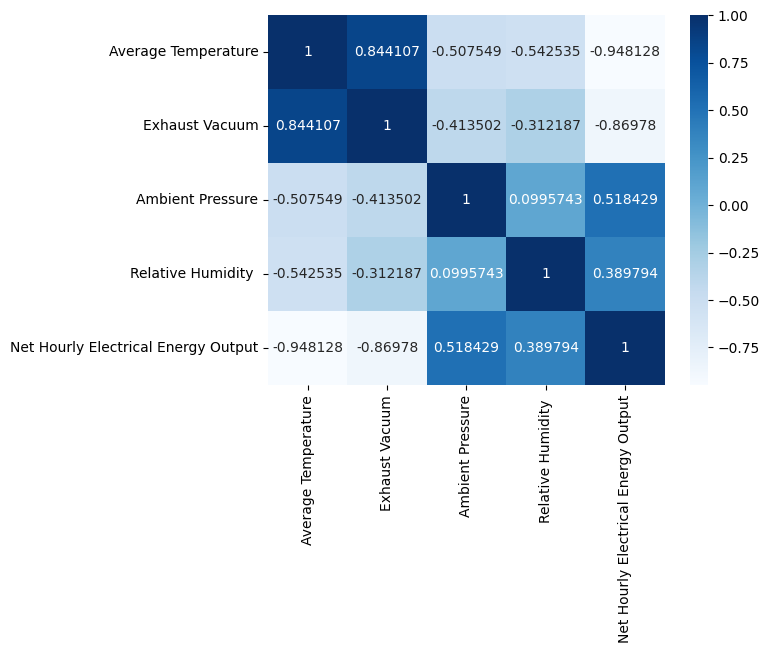

In [ ]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,fmt="g",cmap="Blues")

<Axes: xlabel='Net Hourly Electrical Energy Output', ylabel='Count'>

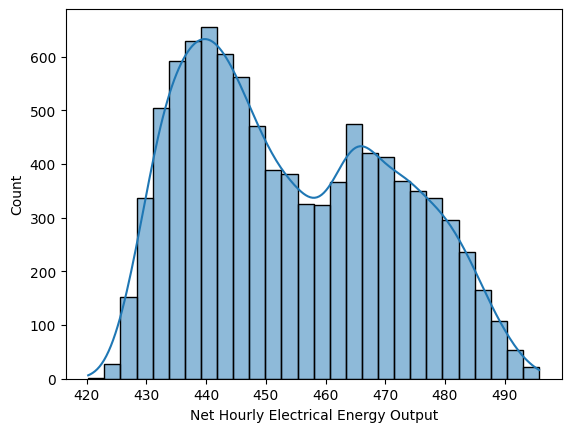

In [ ]:
sns.histplot(df["Net Hourly Electrical Energy Output"],kde=True)

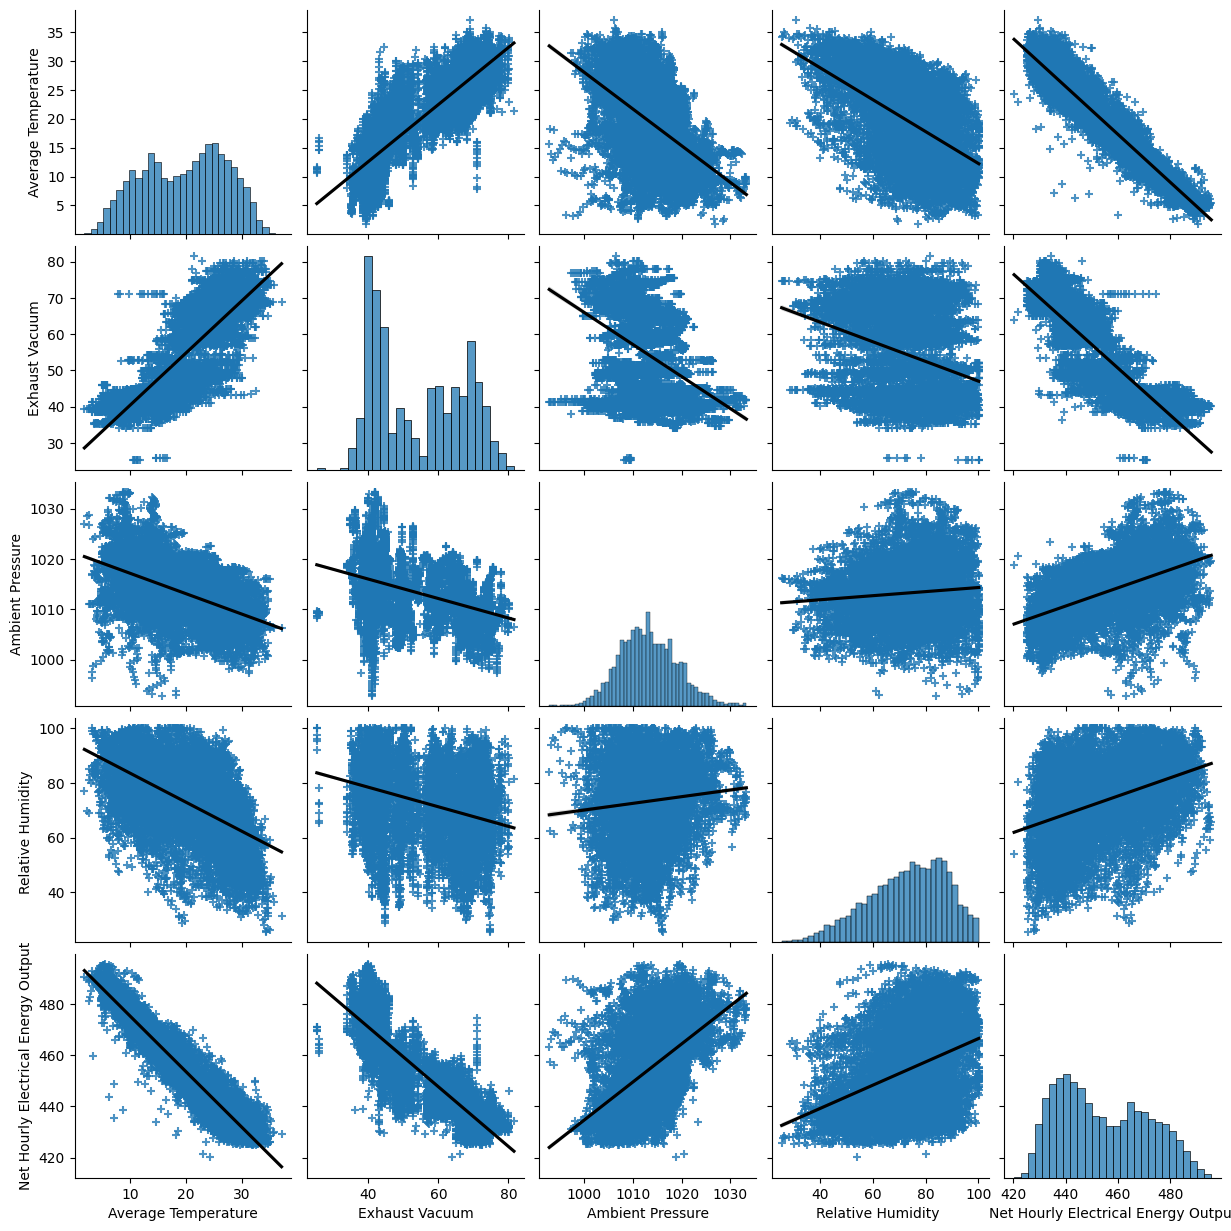

In [ ]:
sns.pairplot(df,kind="reg",markers="+",plot_kws={
    "line_kws":{"color":"black"}
})

In [ ]:
X=df.drop("Net Hourly Electrical Energy Output", axis=1).values
y=df["Net Hourly Electrical Energy Output"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
#creating the model
model=Sequential()

#adding the input layer with first hidden layer
model.add(Dense(units=6,activation="relu"))

#adding second hidden layer
model.add(Dense(units=6,activation="relu"))

#adding the output layer
model.add(Dense(units=1))

#compiling the model
model.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
model.fit(X_train,y_train,epochs=100,batch_size=32,validation_data=(X_test,y_test),callbacks=EarlyStopping(monitor="val_loss",patience=4))

Epoch 1/100
240/240 [==============================] - 2s 5ms/step - loss: 204893.3125 - val_loss: 201703.8750
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 192607.5000 - val_loss: 177399.1562
Epoch 3/100
240/240 [==============================] - 1s 2ms/step - loss: 152246.0156 - val_loss: 122064.4375
Epoch 4/100
240/240 [==============================] - 1s 3ms/step - loss: 91218.6562 - val_loss: 62365.0312
Epoch 5/100
240/240 [==============================] - 1s 2ms/step - loss: 44016.2148 - val_loss: 30877.7539
Epoch 6/100
240/240 [==============================] - 1s 2ms/step - loss: 25262.2070 - val_loss: 21530.0957
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 19246.0469 - val_loss: 17253.5039
Epoch 8/100
240/240 [==============================] - 1s 2ms/step - loss: 15449.1426 - val_loss: 13654.8379
Epoch 9/100
240/240 [==============================] - 1s 2ms/step - loss: 12017.9414 - val_loss: 10324.3975
Epoch 10/100


<Axes: >

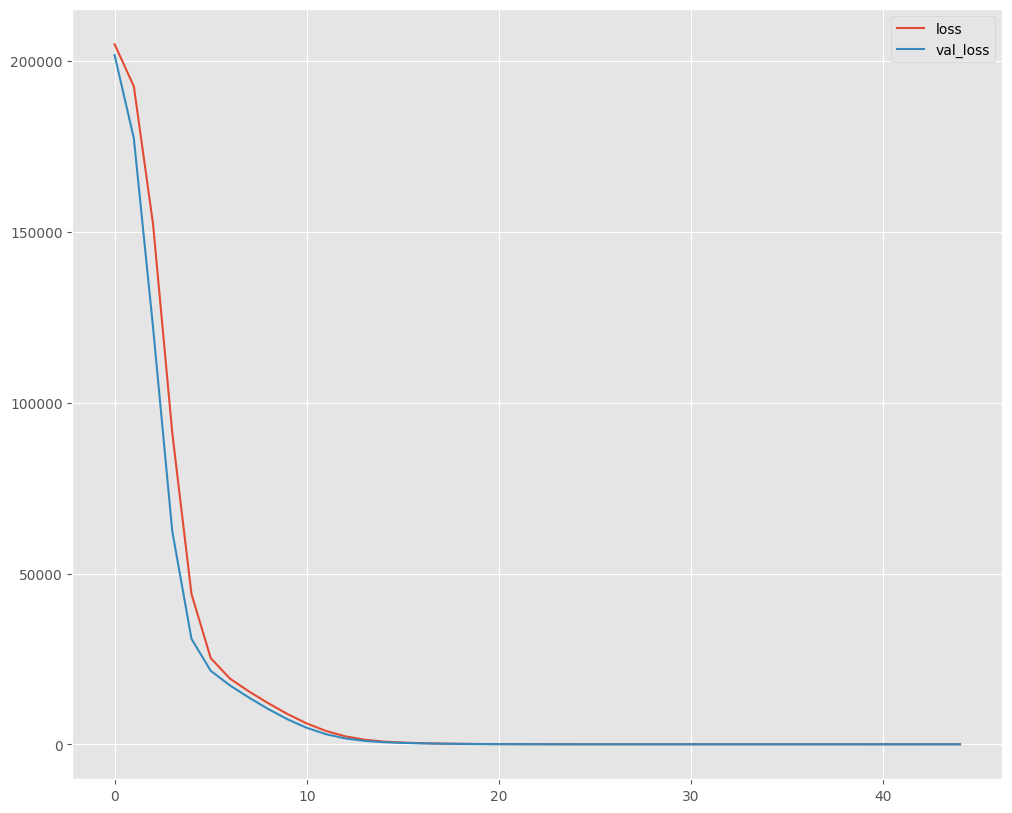

In [ ]:
plt.style.use("ggplot")
pd.DataFrame(model.history.history).plot(figsize=(12,10))